In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data:

In [317]:
df_birthdays = pd.read_csv('./data/birthdays.csv')
df_bodies = pd.read_csv("./data/bodies.csv")
df_countries = pd.read_csv('./data/countries.csv')
df_anime = pd.read_csv("./data/anime_characters.csv")
df_film = pd.read_csv("./data/film_characters.csv")
df_music = pd.read_csv("./data/music.csv")
df_students = pd.read_csv("./data/student_mental_health.csv")

---

## Cleaning data:

### 1. Birthday before:

In [318]:
df_birthdays.head()

,Timestamp,Birthday,Time of Birth (not required),MBTI Type
0,4/12/2020 17:39:37,9/13/1996,NaN,INFJ
1,4/12/2020 17:45:59,3/8/2000,NaN,ISTJ
2,4/12/2020 17:58:56,8/20/2000,NaN,INTP
3,4/12/2020 18:10:25,6/30/2000,NaN,INFP
4,4/12/2020 18:10:27,6/30/2000,NaN,INFP


### After:

In [319]:
df_birthdays.drop(['Time of Birth (not required)', 'Timestamp'], axis=1, inplace=True)
df_birthdays['Birthday'] = pd.to_datetime(df_birthdays['Birthday'])
df_birthdays.head()

,Birthday,MBTI Type
0,1996-09-13,INFJ
1,2000-03-08,ISTJ
2,2000-08-20,INTP
3,2000-06-30,INFP
4,2000-06-30,INFP


---

### 2. Body before:

In [320]:
df_bodies.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


### After:

In [321]:
df_bodies.drop(['S No', 'E', 'I', 'S', 'N', 'T', 'F', 'J', 'P', 'PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4'], axis=1, inplace=True)

for column in df_bodies.columns:
    df_bodies.rename(columns={column: column.lower().capitalize()}, inplace=True)
df_bodies.rename(columns={'Mbti': 'MBTI'}, inplace=True)
df_bodies["Weight"] = df_bodies["Weight"] * 0.453592
df_bodies["Height"] = df_bodies["Height"] * 2.54

df_bodies.head()

,Age,Height,Weight,Sex,Activity level,MBTI,Posture
0,53,157.48,56.699000,Female,Low,ESFJ,A
1,52,175.26,71.213944,Male,High,ISTJ,B
2,30,175.26,90.718400,Male,High,ESTJ,A
3,51,167.64,79.378600,Male,Moderate,ISTJ,D
4,45,160.02,90.264808,Female,Moderate,ENFJ,A


---

### 3. Countires before:

In [322]:
df_countries.head()

,Country,ESTJ-A,ESFJ-A,INFP-T,ESFJ-T,ENFP-T,ENFP-A,ESTJ-T,ISFJ-T,ENFJ-A,...,INTP-A,ENTP-T,ISTP-T,ENTJ-T,ISTP-A,INFP-A,ENFJ-T,INTJ-A,ISFP-A,INFJ-A
0,Afghanistan,0.0798,0.0594,0.0482,0.0412,0.0406,0.0390,0.0390,0.0377,0.0364,...,0.0233,0.0227,0.0220,0.0220,0.0214,0.0204,0.0198,0.0182,0.0169,0.0150
1,Albania,0.0469,0.0399,0.0836,0.0266,0.0647,0.0398,0.0198,0.0286,0.0363,...,0.0273,0.0395,0.0128,0.0289,0.0105,0.0209,0.0412,0.0252,0.0108,0.0164
2,Algeria,0.0230,0.0275,0.1218,0.0165,0.0523,0.0334,0.0097,0.0222,0.0262,...,0.0559,0.0306,0.0157,0.0192,0.0173,0.0338,0.0294,0.0404,0.0113,0.0217
3,Andorra,0.0512,0.0372,0.1023,0.0279,0.0930,0.0837,0.0093,0.0279,0.0605,...,0.0233,0.0279,0.0093,0.0186,0.0093,0.0651,0.0558,0.0140,0.0326,0.0419
4,Angola,0.0484,0.0905,0.0771,0.0287,0.0475,0.0323,0.0108,0.0394,0.0475,...,0.0215,0.0215,0.0116,0.0134,0.0206,0.0341,0.0332,0.0269,0.0179,0.0314


### After:

In [323]:
mbti_types = df_countries.columns[1:]

for type in mbti_types:
    no_sufix = type[:-2]
    is_t = type.endswith('-T')

    if is_t:
        a_sufix = no_sufix + '-A'
        mean_of_type = (df_countries[type] + df_countries[a_sufix]) / 2
        df_countries.drop([type, a_sufix], axis=1, inplace=True)
        df_countries[no_sufix] = mean_of_type
        
        
df_countries.head()

,Country,INFP,ESFJ,ENFP,ESTJ,ISFJ,INTP,INFJ,ISFP,ESTP,ISTJ,ESFP,INTJ,ENTP,ISTP,ENTJ,ENFJ
0,Afghanistan,0.03430,0.05030,0.03980,0.05940,0.03050,0.02745,0.02315,0.02300,0.03260,0.03145,0.02635,0.02155,0.02475,0.02170,0.02555,0.02810
1,Albania,0.05225,0.03325,0.05225,0.03335,0.02245,0.03770,0.03740,0.01670,0.01905,0.02090,0.02025,0.03020,0.03960,0.01165,0.03430,0.03875
2,Algeria,0.07780,0.02200,0.04285,0.01635,0.01685,0.07050,0.04000,0.01885,0.01205,0.01600,0.01395,0.04480,0.03695,0.01650,0.02675,0.02780
3,Andorra,0.08370,0.03255,0.08835,0.03025,0.02325,0.02560,0.03955,0.02095,0.00935,0.01395,0.01860,0.01630,0.01860,0.00930,0.02325,0.05815
4,Angola,0.05560,0.05960,0.03990,0.02960,0.03585,0.02820,0.03855,0.02015,0.01840,0.02020,0.02735,0.02330,0.02240,0.01610,0.02460,0.04035


---

### 4. Anime before:

In [324]:
df_anime.head()

,Unnamed: 0,anime_name,anime_genre,character_name,character_mbti_type,character_enneagram_type
0,0,Naruto Shippūden,Shounen,Sasuke Uchiha,INTJ,3w4
1,1,Naruto Shippūden,Shounen,Naruto Uzumaki,ENFP,3w2
2,2,Naruto Shippūden,Shounen,Madara Uchiha,ENTJ,8w9
3,3,Naruto Shippūden,Shounen,Itachi Uchiha,INFJ,1w9
4,4,Naruto Shippūden,Shounen,Sakura Haruno,ESFJ,2w1


### After:

In [325]:
df_anime.drop(["Unnamed: 0", "character_enneagram_type"], axis=1, inplace=True)
df_anime.rename(columns={'anime_name': 'Title'}, inplace=True)
df_anime.rename(columns={'anime_genre': 'Genre'}, inplace=True)
df_anime.rename(columns={'character_name': 'Name'}, inplace=True)
df_anime.rename(columns={'character_mbti_type': 'MBTI'}, inplace=True)

df_anime.head()

,Title,Genre,Name,MBTI
0,Naruto Shippūden,Shounen,Sasuke Uchiha,INTJ
1,Naruto Shippūden,Shounen,Naruto Uzumaki,ENFP
2,Naruto Shippūden,Shounen,Madara Uchiha,ENTJ
3,Naruto Shippūden,Shounen,Itachi Uchiha,INFJ
4,Naruto Shippūden,Shounen,Sakura Haruno,ESFJ


---

### 5. Films before:

In [326]:
df_film.head()

,stat,mbti,enneagram,role,movie,img_url
0,697 / 162,ESFP,7w6,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe,https://www.personality-database.com/profile_i...
1,668 / 231,ESFP,8w7,Anakin Skywalker,Star Wars,https://www.personality-database.com/profile_i...
2,589 / 243,ESFP,6w7,Ron Weasley,Harry Potter (franchise),https://www.personality-database.com/profile_i...
3,312 / 101,ESFP,7w8,Bellatrix Lestrange,Harry Potter (franchise),https://www.personality-database.com/profile_i...
4,302 / 105,ESFP,7w6,Simba,The Lion King (1994),https://www.personality-database.com/profile_i...


### After:

In [327]:
df_film.drop(["stat", "enneagram", "img_url"], axis=1, inplace=True)

for column in df_film.columns:
    df_film.rename(columns={column: column.lower().capitalize()}, inplace=True)
df_film.rename(columns={'mbti': 'MBTI'}, inplace=True)
    
df_film.head()

,Mbti,Role,Movie
0,ESFP,"Peter Quill ""Star-Lord""",Marvel Cinematic Universe
1,ESFP,Anakin Skywalker,Star Wars
2,ESFP,Ron Weasley,Harry Potter (franchise)
3,ESFP,Bellatrix Lestrange,Harry Potter (franchise)
4,ESFP,Simba,The Lion King (1994)


---

### 6. Music before:

In [328]:
df_music.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### After:

In [329]:
df_music.drop(
    [
        "Timestamp",
        "Primary streaming service",
        "Permissions",
        "Instrumentalist",
        "Composer",
        "Exploratory",
        "Foreign languages",
        "BPM"
    ],
    axis=1,
    inplace=True,
)

for column in df_music.columns:
    columns_to_drop = [column for column in df_music.columns if column.startswith('Frequency')]
    df_music.drop(columns_to_drop, axis=1, inplace=True)
df_music.head()

,Age,Hours per day,While working,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Latin,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,Yes,Rock,7.0,2.0,2.0,1.0,NaN
2,18.0,4.0,No,Video game music,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,Jazz,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,R&B,7.0,2.0,5.0,9.0,Improve


---

### 7. Students mental health before:

In [330]:
df_students.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### After:

In [331]:
df_students.drop(["Timestamp", "What is your CGPA?", "Did you seek any specialist for a treatment?"], axis=1, inplace=True)
df_students.rename(columns={"Choose your gender": "Gender"}, inplace=True)
df_students.rename(columns={"What is your course?": "Course"}, inplace=True)
df_students.rename(columns={"Your current year of Study": "Year of study"}, inplace=True)
df_students.rename(columns={"Do you have Depression?": "Depression"}, inplace=True)
df_students.rename(columns={"Do you have Anxiety?": "Anxiety"}, inplace=True)
df_students.rename(columns={"Do you have Panic attack?": "Panic attack"}, inplace=True)

df_students.head()

,Gender,Age,Course,Year of study,Marital status,Depression,Anxiety,Panic attack
0,Female,18.0,Engineering,year 1,No,Yes,No,Yes
1,Male,21.0,Islamic education,year 2,No,No,Yes,No
2,Male,19.0,BIT,Year 1,No,Yes,Yes,Yes
3,Female,22.0,Laws,year 3,Yes,Yes,No,No
4,Male,23.0,Mathemathics,year 4,No,No,No,No


---

## Comparison of birth months and personality types:

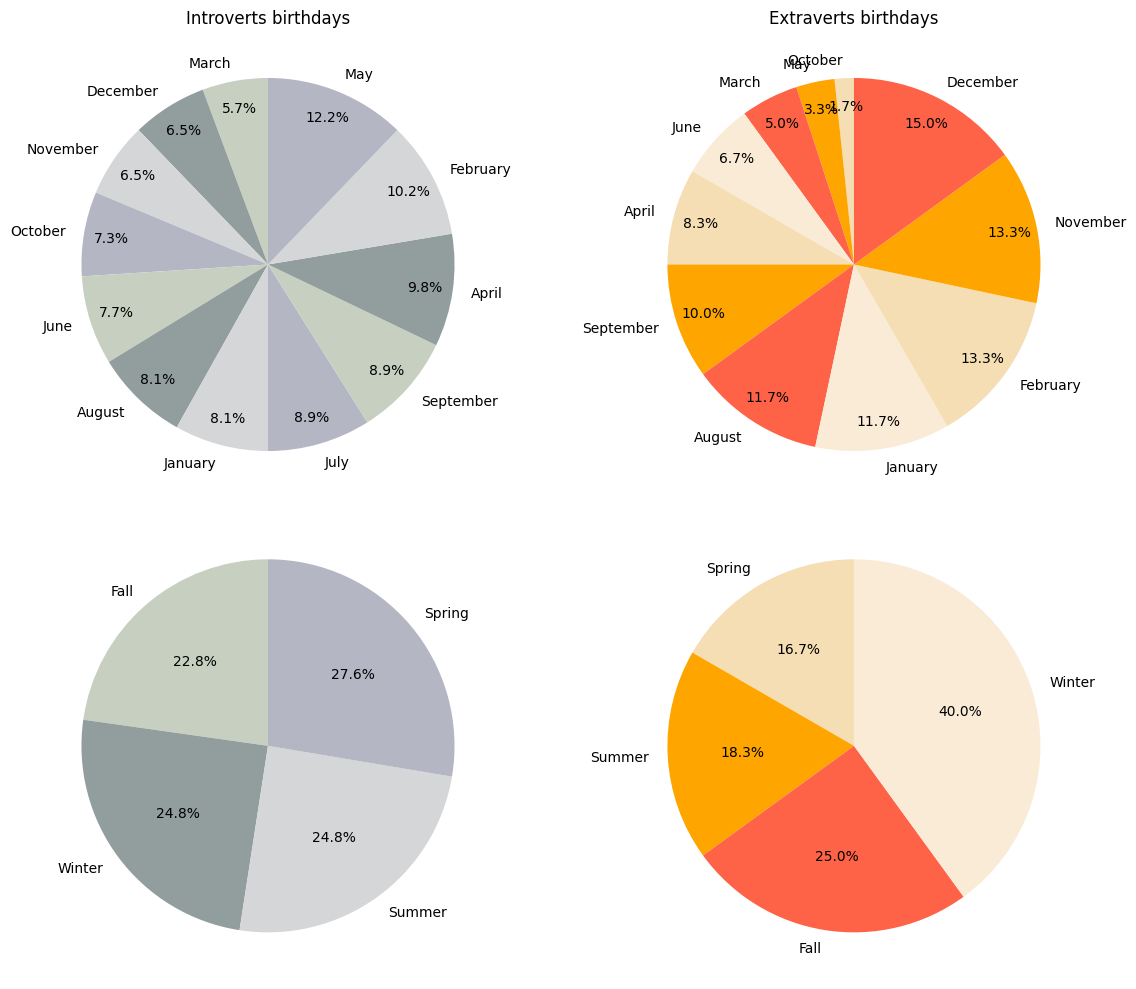

In [332]:
df_birthdays["Month"] = df_birthdays["Birthday"].dt.strftime("%B")

colors_i = ["#c7d0c0", "#929e9d", "#d5d6d8", "#b5b6c4"]
colors_e = ["wheat", "orange", "tomato", "antiquewhite"]

seasons = ["Winter", "Spring", "Summer", "Fall"]
seasons_conf = {"January": "Winter",
        "February": "Winter",
        "March": "Spring",
        "April": "Spring",
        "May": "Spring",
        "June": "Summer",
        "July": "Summer",
        "August": "Summer",
        "September": "Fall",
        "October": "Fall",
        "November": "Fall",
        "December": "Winter",}

introverts = df_birthdays[df_birthdays["MBTI Type"].str.startswith("I")]
extraverts = df_birthdays[df_birthdays["MBTI Type"].str.startswith("E")]

grouped_data_i = introverts.groupby("Month").size().sort_values()
seasons_i = grouped_data_i.index.to_series().map(seasons_conf)
seasons_i = grouped_data_i.groupby(seasons_i).sum().reindex(seasons).sort_values()


grouped_data_e = extraverts.groupby("Month").size().sort_values()
seasons_e = grouped_data_e.index.to_series().map(seasons_conf)
seasons_e = grouped_data_e.groupby(seasons_e).sum().reindex(seasons).sort_values()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

grouped_data_i.plot(
    kind="pie",
    colors=colors_i,
    startangle=90,
    autopct="%1.1f%%",
    pctdistance=0.85,
    ax=ax1,
)
seasons_i.plot(
    kind="pie",
    colors=colors_i,
    startangle=90,
    autopct="%1.1f%%",
    pctdistance=0.6,
    ax=ax3,
)
ax1.set_title("Introverts birthdays")

grouped_data_e.plot(
    kind="pie",
    colors=colors_e,
    startangle=90,
    autopct="%1.1f%%",
    pctdistance=0.85,
    ax=ax2,
)
seasons_e.plot(
    kind="pie",
    colors=colors_e,
    startangle=90,
    autopct="%1.1f%%",
    pctdistance=0.6,
    ax=ax4,
)
ax2.set_title("Extraverts birthdays")

plt.tight_layout()
plt.show()

---
## Comparison postures and personality types:

### Height and Weight:

Average weight of introverts: 73.7kg
Average height of introverts: 168.8cm
Average weight of extraverts: 77.3kg
Average height of extraverts: 169.4cm


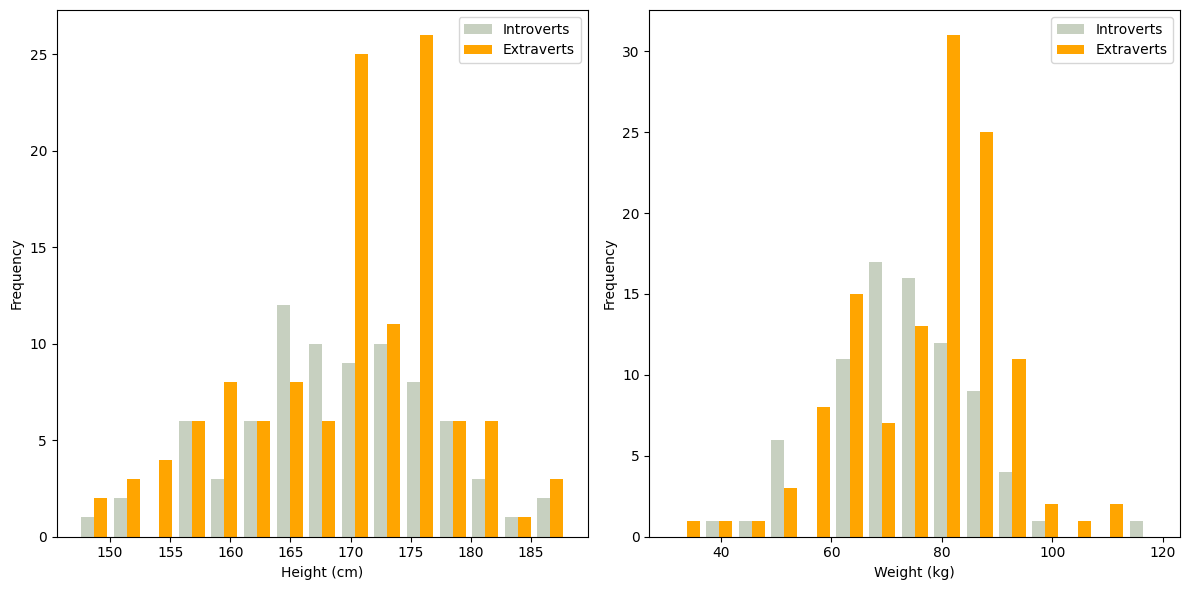

In [348]:
# сравнение позы интровертов и экстравертов
# у кого лучше поза, у межчин или женщин
# разделить возраст на группы и посмотреть какие проблемы у них (тоже самое сделать с весом)

introverts = df_bodies[df_bodies["MBTI"].str.startswith("I")]
extraverts = df_bodies[df_bodies["MBTI"].str.startswith("E")]

weight_i = introverts["Weight"].mean()
height_i = introverts["Height"].mean()

weight_e = extraverts["Weight"].mean()
height_e = extraverts["Height"].mean()

print(f"Average weight of introverts: {weight_i.round(1)}kg")
print(f"Average height of introverts: {height_i.round(1)}cm")
print(f"Average weight of extraverts: {weight_e.round(1)}kg")
print(f"Average height of extraverts: {height_e.round(1)}cm")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(
    [introverts["Height"], extraverts["Height"]],
    bins=15,
    color=["#c7d0c0", "orange"],
    label=["Introverts", "Extraverts"],
)
ax1.set_xlabel("Height (cm)")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.hist(
    [introverts["Weight"], extraverts["Weight"]],
    bins=15,
    color=["#c7d0c0", "orange"],
    label=["Introverts", "Extraverts"],
)
ax2.set_xlabel("Weight (kg)")
ax2.set_ylabel("Frequency")
ax2.legend()

plt.tight_layout()
plt.show()

### Posture level:

In [350]:
# make a bar chart with comparing posture of introverts and extraverts

posture_i = introverts["Posture"].value_counts()
posture_e = extraverts["Posture"].value_counts()
print(posture_i)

Posture
D    33
C    29
B    13
A     4
Name: count, dtype: int64
